# Assignment 1 - Part 1: Linear Regression on Boston Housing Data



Estimated Y-Intercept Coefficient: 
 [30.28894834]


Coefficients: 
 [[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]


Mean squared error with test data: 24.31
Variance score with test data: 0.67


Mean squared error with train data: 21.64
Variance score with train data: 0.75




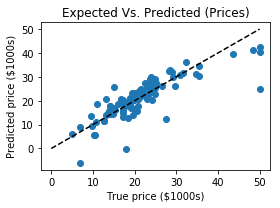

In [1]:


# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# Bonus: For variance score. Task 1-3
from sklearn.metrics import r2_score
# For inverse matrix. Task 2-1
from numpy.linalg import inv


# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

#_________________________________________________________________________________________________________________
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)
#X = data(weights)
#Y = target(prices)
boston = data, target

#_________________________________________________________________________________________________________________
# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

#train_data = X-Train
#test_data = X-Test
#train_target = Y-Train
#test_target = Y-Test

#Y = boston housing prices (also called "target" data)
#X = all the other features[13] (or independent variables)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#                                          Task to complete                                                      # 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#=================================================================================================================
# Task 1-1: use linear regression in scikit-learn
#=================================================================================================================

# Creating linear regression object
regr = linear_model.LinearRegression()
# Training the model using the training sets to fit a linear model
regr.fit(train_data, train_target)
# Estimates the coefficients the linear regression using least squares.
# Making predictions for Y using the testing set.
boston_y_predI = regr.predict(test_data)
# Making predictions for Y using the training set.
boston_y_predII = regr.predict(train_data)


#=================================================================================================================
# Task 1-2: show intercept and coefficients
#=================================================================================================================

# The Estimated Intercept
print('\n\nEstimated Y-Intercept Coefficient: \n', regr.intercept_)

# The Estimated Coefficients
print('\n\nCoefficients: \n', regr.coef_)
#feature_cols = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

#=================================================================================================================
# Task 1-3: show errors on training dataset and testing dataset
#=================================================================================================================
# The mean squared error w/ test data
print("\n\nMean squared error with test data: %.2f"
      % np.mean((boston_y_predI - test_target) ** 2))

# Explained variance score: 1 is perfect prediction
# The Variance score w/ test data
print('Variance score with test data: %.2f' % r2_score(test_target, boston_y_predI))

# The mean squared error w/ test data
print("\n\nMean squared error with train data: %.2f"
      % np.mean((boston_y_predII - train_target) ** 2))

# The Variance score w/ train data
print('Variance score with train data: %.2f' % r2_score(train_target, boston_y_predII))

#=================================================================================================================
# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
#=================================================================================================================
print('\n')

#Predict Y using the linear model with estimated coefficients
predictedI = boston_y_predI
expectedI = test_target

plt.figure(figsize=(4, 3))
plt.scatter(expectedI, predictedI)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title('Expected Vs. Predicted (Prices)')
plt.tight_layout()


# Use analytical solution (normal equation) to perform linear regression in the following cell



Estimated Y-Intercept Coefficient: 
 [30.28894834]


Coefficients: 
 [[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]


Mean squared error with test data: 24.31
Variance score with test data: 0.67


Mean squared error with train data: 21.64
Variance score with train data: 0.75




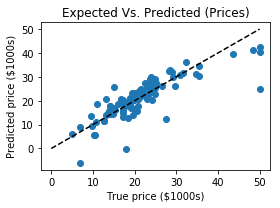

In [2]:
#=================================================================================================================
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and training label(Output)
# Output: Weights

def myNormalEqualFun(X,y):
    # Normal Equation: Theta = inverse(X^T * X) * X^T * y
    # We transpose X, using a shorthand (T) for the pandas transpose method. []---> X_transpose = X^T <---[]
    X_transpose = X.T
    global theta
    theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    # Returns a list of weights
    return theta

#=================================================================================================================  
# Task 2-2: Implement a function performing prediction
#=================================================================================================================
# Inputs: Testing data and weights
# Output: Predictions

# Prediction Equation: y = theta^t * X
# predict using coefficients
def myPredictFun(X,w):
    # Making predictions for Y using.
    y_predict = X.dot(theta)
    return y_predict

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights(aka w = theta)
w = myNormalEqualFun(train_data_intercept, train_target)

# Making predictions for Y using the testing set.
boston_y_predIII = myPredictFun(test_data_intercept, w)

# Making predictions for Y using the training set.
boston_y_predIV = myPredictFun(train_data_intercept, w)

#=================================================================================================================
# Task 2-3: show intercept and coefficents
#=================================================================================================================

# The Estimated Intercept
print('\n\nEstimated Y-Intercept Coefficient: \n', regr.intercept_)

# The Estimated Coefficients
print('\n\nCoefficients: \n', regr.coef_)

#=================================================================================================================
# Task 2-4: show errors on training dataset and testing dataset
#=================================================================================================================
# The mean squared error w/ test data
print("\n\nMean squared error with test data: %.2f"
      % np.mean((boston_y_predIII - test_target) ** 2))

# Explained variance score: 1 is perfect prediction
# The Variance score w/ test data
print('Variance score with test data: %.2f' % r2_score(test_target, boston_y_predIII))

# The mean squared error w/ test data
print("\n\nMean squared error with train data: %.2f"
      % np.mean((boston_y_predIV - train_target) ** 2))

# The Variance score w/ train data
print('Variance score with train data: %.2f' % r2_score(train_target, boston_y_predIV))

#=================================================================================================================
# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
#=================================================================================================================
print('\n')

#Predict Y using the linear model with estimated coefficients
predictedII = boston_y_predIII
expectedII = test_target

plt.figure(figsize=(4, 3))
plt.scatter(expectedII, predictedII)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title('Expected Vs. Predicted (Prices)')
plt.tight_layout()


# Use numerical solution (gradient descent) to perform linear regression in the following cell



Estimated Y-Intercept Coefficient: 22.797
Estimated Slope Coefficient: -1.085


Coefficients: 
 [[22.79685811]
 [-1.08450219]
 [ 0.36478337]
 [ 0.63379458]
 [ 0.82651717]
 [-3.9443835 ]
 [ 3.23524482]
 [ 0.13554953]
 [-3.4607859 ]
 [ 1.55244936]
 [-0.30430493]
 [-2.62669881]
 [ 1.13363191]
 [-3.23778461]]


Mean squared error with test data: 26.35
Variance score with test data: 0.64


Mean squared error with train data: 22.67
Variance score with train data: 0.74




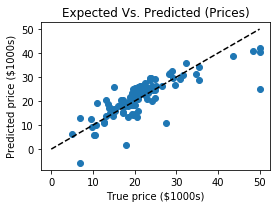

In [3]:
# Below is my implementation of gradient descent for linear regression problem.
# At first, we calculate gradient like X.T * (X * w - y) / N and update your current theta with this gradient simultaneously.

# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

#=================================================================================================================
# Task 3-1: Implement a function performing gradient descent [Cost Function > Gradient > Gradients]
#=================================================================================================================
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
# The following code runs until it converges or reaches iteration maximum. We get θ0 and θ1 as its output:

# Calculates the cost for given X and Y.
def  cal_cost(theta,X,y):
    # m denotes the number of examples here, not the number of features
    m = len(y)    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

# Returns the final theta/weights vector and array of cost history over no of iterations.
def myGradientDescentFun(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,14))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        # update theta
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
#=================================================================================================================
# Task 3-2: Implement a function performing prediction
#=================================================================================================================
# Inputs: Testing data and weights
# Output: Predictions

def myPredictFun(X,w):
    # Making predictions for Y using.
    y_predict = X.dot(theta)
    return y_predict

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)


lr =0.01
n_iter = 1000

#X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = myGradientDescentFun(train_data_intercept,train_target,w,lr,n_iter)

# Making predictions for Y using the testing set.
boston_y_predV = myPredictFun(test_data_intercept, theta)

# Making predictions for Y using the training set.
boston_y_predVI = myPredictFun(train_data_intercept, theta)

#=================================================================================================================
# Task 3-3: show intercept and coefficents
#=================================================================================================================

# The Estimated Intercept
print('\n\nEstimated Y-Intercept Coefficient: {:0.3f}'.format(theta[0][0]))
# The Estimated Slope
print('Estimated Slope Coefficient: {:0.3f}'.format(theta[1][0]))

# The Estimated Coefficients
print('\n\nCoefficients: \n', theta)

#=================================================================================================================
# Task 3-4: show errors on training dataset and testing dataset
#=================================================================================================================

# The mean squared error w/ test data
print("\n\nMean squared error with test data: %.2f"
      % np.mean((boston_y_predV - test_target) ** 2))

# Explained variance score: 1 is perfect prediction
# The Variance score w/ test data
print('Variance score with test data: %.2f' % r2_score(test_target, boston_y_predV))

# The mean squared error w/ test data
print("\n\nMean squared error with train data: %.2f"
      % np.mean((boston_y_predVI - train_target) ** 2))

# The Variance score w/ train data
print('Variance score with train data: %.2f' % r2_score(train_target, boston_y_predVI))

#print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

#=================================================================================================================
# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
#=================================================================================================================
print('\n')

#Predict Y using the linear model with estimated coefficients
predictedIII = boston_y_predV
expectedIII = test_target

plt.figure(figsize=(4, 3))
plt.scatter(expectedIII, predictedIII)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title('Expected Vs. Predicted (Prices)')
plt.tight_layout()
